In [1]:
import sqlite3
import requests
import json
import datetime
from urllib.parse import urlparse
from urllib.parse import parse_qs
from time import sleep
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
from scipy.signal import find_peaks_cwt


from methods import *

In [2]:
getPostsToTimestamp("abu dhabi gp 2023", timestamp = 1701010800, replace = False, debug = True)

1701010797 -> 1701010612 ( 3.1 min | 6.5 posts/min)

1701010797 	 esteben-hur 	
1701010796 	 eirianerisdar 	
1701010788 	 brklynlewis 	
1701010770 	 sebvettelsv5 	
1701010762 	 valyrfia 	
1701010759 	 shippingcannons 	
1701010753 	 riotinyellow 	
1701010743 	 leclercloml 	
1701010727 	 meep-meep-richie 	
1701010716 	 garykingz 	
1701010708 	 vettely 	
1701010677 	 russellius 	
1701010667 	 isadora16aslani 	
1701010646 	 ro55ocorsa 	
1701010629 	 umgeorge 	
1701010629 	 eightyones 	
1701010625 	 multiseb21 	
1701010624 	 elenazamos 	
1701010621 	 rizz07 	
1701010612 	 vroomvroomsposts 	


1701010612

In [33]:
fetchPostsForRace("abu dhabi gp 2023")

Current tag: abu dhabi gp 2023
Current tag: formula 1)
Current tag: f1 posts )
Current tag: formula1 )


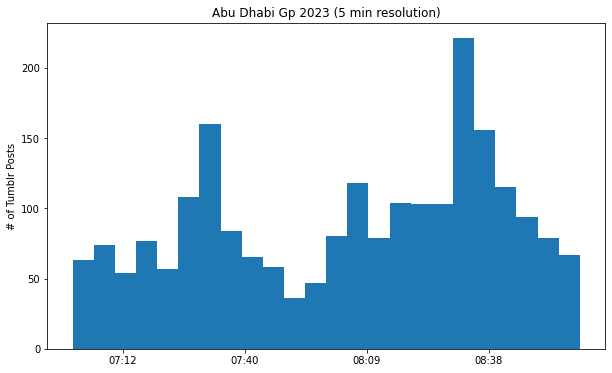

(array([11, 13,  7, 17, 14, 24, 12, 12, 13, 13, 11, 12, 10, 11, 10, 14, 23,
       16, 11, 14, 14, 11,  7, 12, 13, 18, 31, 20, 20, 19, 34, 56, 33, 25,
       12, 22, 14, 23, 13, 12, 16,  9, 13,  8, 19, 14, 14, 13,  5, 12,  8,
        3,  4, 12,  9,  7,  6, 11, 13, 10, 12, 12, 20, 20, 16, 15, 30, 27,
       27, 19, 22, 15, 10, 17, 15, 28, 17, 23, 21, 16, 23, 24, 22, 19, 14,
       12, 20, 15, 28, 28, 43, 46, 44, 42, 47, 37, 35, 25, 31, 29, 30, 21,
       24, 19, 22, 15, 19, 16, 22, 19, 15, 18, 13, 14, 19, 10, 18, 13, 12,
       14], dtype=int64), array([1701003600, 1701003660, 1701003720, 1701003780, 1701003840,
       1701003900, 1701003960, 1701004020, 1701004080, 1701004140,
       1701004200, 1701004260, 1701004320, 1701004380, 1701004440,
       1701004500, 1701004560, 1701004620, 1701004680, 1701004740,
       1701004800, 1701004860, 1701004920, 1701004980, 1701005040,
       1701005100, 1701005160, 1701005220, 1701005280, 1701005340,
       1701005400, 1701005460, 1701005520, 170

In [42]:
def raceSummary(race, endTime = 1701010800, startTime = 1701003600, resolution = 5):
    
    # Get Data
    c.execute('select * from "' + race + '" WHERE "timestamp" >= ? AND "timestamp" <= ?',(startTime, endTime))
    data = c.fetchall()
    timestamps = []
    for row in data:
        timestamps.append(row[1])
   
    
    
    # Plot Time Chart
    dates=[datetime.datetime.fromtimestamp(ts) for ts in timestamps]
    datenums=md.date2num(dates)
    xfmt = md.DateFormatter('%H:%M')
    plt.figure(figsize=(10,6))
    plt.title(race.title() + " (" + str(resolution) +" min resolution)")
    plt.ylabel("# of Tumblr Posts")
    ax=plt.gca()
    ax.xaxis.set_major_formatter(xfmt)
    plt.hist(datenums, bins=int(120/resolution))
    plt.show()
    
    
    # Per-minute Frequency
    wordFreqMinute = np.histogram(
        timestamps,
        bins=range(
            min(timestamps)-min(timestamps)%60, # Get start of the minute
            max(timestamps) + 60,
            60
        )
    )
    print(wordFreqMinute)
    
    
raceSummary("abu dhabi gp 2023")